# Heatmap Comparison

This notebooks provides an overview for using and understanding Heatmap comparison check.

**Structure:**

- [What is a heatmap comparison?](#what_is_heatmap_comparison)
- [Run check on a Classification task](#run_check_on_classification)
- [Run check on an Object Detection task](#run_check_on_object_detection)
- [Limit to specific classes ](#limit_to_specific_classes)

## What is a heatmap comparison? <a name='what_is_heatmap_comparison'></a>

Heatmap comparison is one method of detecting data drift in image data. Data drift is simply a change in the distribution of data over time or between several distinct cases. It is also one of the top reasons of a machine learning model performance degrades over time and when applied to new scenarios. 
A traditional method to detect such drift would be using statistical methods. Such an approach is covered by several builtin check in the deepchecks.vision package, such as the [Label Drif](train_test_label_drift.ipynb) check or the [Image Dataset Drift](image_dataset_drift.ipynb) check. 

An additional, more intuitive approach for visualizing and detecting drift in image data is simple inspecting the average images. The <b>Heatmap comparison</b> check simply computes an average image for all images in each dataset, train and test, and visualized both the average images and the difference between the average images. That way, if there a significant average difference between two datasets it would be apparent in these average images. For example, if training data contains significantly more images with sky, we will see that the average train image is brighter in the upper half of the image.

### Comparing Labels for Object Detection

For object detection tasks, it is also possible to visualize Label Drift (as a complementary approach to the [Label Drif](train_test_label_drift.ipynb) check). This can be done by displaying the average of bounding box label coverage within the images in each dataset. This is done by producing label maps per image, in which each pixel inside a bounding box is white and the rest and black. Then, the average of all these images is displayed.

In our previous example, the drift caused by more images with sky in training would also be visible by a lack of labels in the upper half of the average label map of the training data, due to lack of labels in the sky.

## Run the check on a Classification task (MNIST) <a name='run_check_on_classification'></a>

### Imports

In [1]:
from deepchecks.vision.dataset import VisionData
from deepchecks.vision.checks import TrainTestLabelDrift

### Loading data:

In [2]:
from deepchecks.vision.datasets.classification.mnist import load_dataset

mnist_data_train = load_dataset(train=True, batch_size=64, object_type='VisionData')
mnist_data_test = load_dataset(train=False, batch_size=64, object_type='VisionData')

### Running HeatmapComparison on classification

In [3]:
from deepchecks.vision.checks.distribution import HeatmapComparison

Heatmap Comparison Check if the average image brightness (or bbox location if applicable) is similar between train and test set. Read More... Additional Outputs 0 100 200 Pixel Value Compare average image brightness Train Test Test - Train
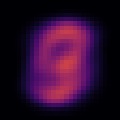
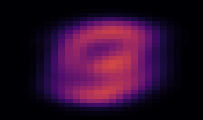
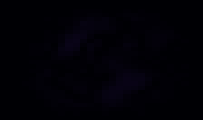

In [4]:
check = HeatmapComparison()
check.run(mnist_data_train, mnist_data_test)

## Run the check on an Object Detection task (COCO) <a name='run_check_on_object_detection'></a>

In [12]:
from deepchecks.vision.datasets.detection.coco import load_dataset, yolo_label_formatter, yolo_image_formatter, LABEL_MAP

train_dataloader = load_dataset(train=True)
test_dataloader = load_dataset(train=False)

In [13]:
from deepchecks.vision.utils.detection_formatters import DetectionLabelFormatter
from deepchecks.vision.utils.image_formatters import ImageFormatter

train_ds = VisionData(train_dataloader, label_formatter=DetectionLabelFormatter(yolo_label_formatter),
                      image_formatter=ImageFormatter(yolo_image_formatter), label_map=LABEL_MAP)
test_ds = VisionData(test_dataloader, label_formatter=DetectionLabelFormatter(yolo_label_formatter),
                      image_formatter=ImageFormatter(yolo_image_formatter), label_map=LABEL_MAP)

Heatmap Comparison Check if the average image brightness (or bbox location if applicable) is similar between train and test set. Read More... Additional Outputs 0 100 200 Pixel Value Compare average image brightness Train Test Test - Train 0 50 100 % Coverage Compare average label bbox locations Train Test Test - Train
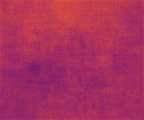
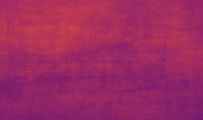
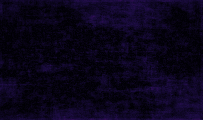
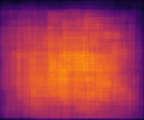
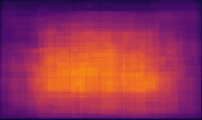
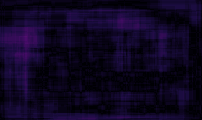

In [7]:
check = HeatmapComparison()
check.run(train_ds, test_ds)

## Limit to specific classes <a name='limit_to_specific_classes'></a>

The check can be limited to compare the bounding box coverage for a specific set of classes. We'll use that to inspect only objects labeled as human (class_id 0)

Class id 30 is not in the label map.


Heatmap Comparison Check if the average image brightness (or bbox location if applicable) is similar between train and test set. Read More... Additional Outputs 0 100 200 Pixel Value Compare average image brightness Train Test Test - Train 0 50 100 % Coverage Compare average label bbox locations Train Test Test - Train
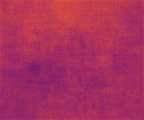
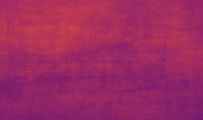
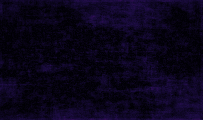
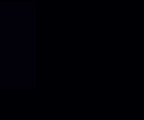
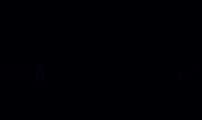
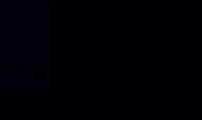

In [23]:
check = HeatmapComparison(classes_to_display=['person'])
check.run(train_ds, test_ds)

We can see a significant increased abundance of humans in the test data, located in the images lower center!